In [ ]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.2 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import praw
import pandas as pd

# Define Reddit submission URL and authentication credentials
POST_URL = "https://www.reddit.com/r/teslamotors/comments/18xhj8w/the_tesla_model_s_has_gone_from_gamechanger_to/"
SECRET = ""
APP_ID = ""

# Authenticate with Reddit API using credentials
reddit = praw.Reddit(
    client_id=APP_ID,
    client_secret=SECRET,
    user_agent="Comment Extraction"
)

# Specify Reddit submission URL and retrieve submission
url = POST_URL
post = reddit.submission(url=url)

# Define function to recursively process comments
def process_comments(comments):
    rows = []
    for comment in comments:
        if isinstance(comment, praw.models.MoreComments):
            # If the comment is a MoreComments object, recursively process its child comments
            rows.extend(process_comments(comment.comments()))
        else:
            if not comment.author:  # Skip comments without an author
                continue
            # Extract relevant comment data and append to rows list
            row = {"author": comment.author.name,
                   "body": comment.body,
                   "n_words": len(comment.body.split())}
            rows.append(row)
    return rows

# Process comments of the post and store in rows list
rows = process_comments(post.comments.list())

# Define function to count characters in comment body
def count_characters(row):
    return len(row.body)

# Create pandas DataFrame from processed comments data
df = pd.DataFrame(rows)

# Add a column containing the character count for each comment
df["chars"] = df.apply(count_characters, axis=1)

# Display summary statistics for character counts
print("Minimum character count:", df["chars"].min())
print("Maximum character count:", df["chars"].max())
print("Mean character count:", df["chars"].mean())

# Export DataFrame to CSV file without including index column
df.to_csv("comments-dataset.csv", index=False)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Minimum character count: 2
Maximum character count: 1542
Mean character count: 215.1010101010101


In [ ]:
df

,author,body,n_words,chars
0,AutoModerator,"As we are not a support sub, please make sure ...",62,566
1,catlovingtwink99,Model S is the best looking car in the Tesla l...,13,58
2,zeek215,> Tesla is the Model 3 and Model Y company now...,25,119
3,loganintx,35k miles on my Aug ‘21 Model S. Driving back ...,96,456
4,itsmontoya,The S looks so much nicer than the 3. I'd love...,20,87
...,...,...,...,...
589,stacecom,lol! Nice.,2,11
590,gnoxy,> But that’s not the fault of the product is i...,89,438
591,cookingboy,> I am the market for the product\n\nBut you l...,174,928
592,gnoxy,"Its not me who is out of touch, its our custom...",84,552


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Preprocessing the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])
    return text

# Apply preprocessing to the 'body' column
df['cleaned_body'] = df['body'].apply(preprocess_text)


In [ ]:
import re

# Define a function to remove emojis using regular expressions
def remove_emojis(text):
    # Emoji pattern
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    # Remove emojis
    return emoji_pattern.sub(r'', text)

# Apply the remove_emojis function to the 'body' column
df['cleaned_body'] = df['cleaned_body'].apply(remove_emojis)



In [ ]:
# Summary statistics
print("Summary Statistics of Character Count:")
print("Minimum:", df["chars"].min())
print("Maximum:", df["chars"].max())
print("Mean:", df["chars"].mean())

# Save preprocessed data to a CSV file
df.to_csv("preprocessed-comments-dataset.csv", index=False)


Summary Statistics of Character Count:
Minimum: 2
Maximum: 1542
Mean: 215.1010101010101


<ipython-input-7-9848d3626cbf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')


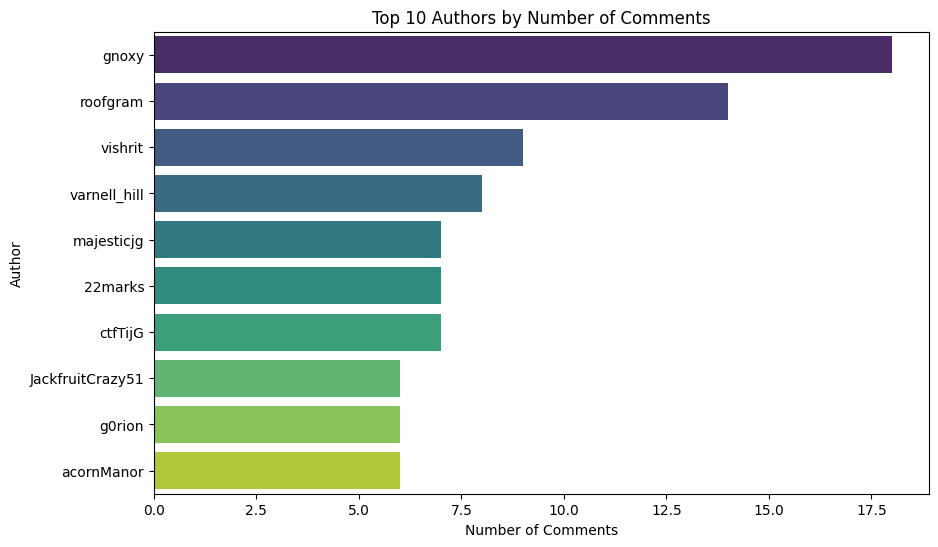

In [ ]:
# Get the top 10 authors by the number of comments
top_authors = df['author'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('Author')
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from collections import Counter  # Import the Counter class

# Download NLTK stop words
nltk.download('stopwords')

# Get English stop words
stop_words = set(stopwords.words('english'))

words = []
for n, comment in enumerate(post.comments.list()):
    if n == 50:
        break
    if not comment.author:  # not all comments have an author
        continue

    # Tokenize comment, remove stop words, and remove duplicates
    unique_words = set(word for word in comment.body.split() if word.lower() not in stop_words)
    words.extend(unique_words)

# Count word frequencies
word_counts = Counter(words)

# Plot the top 10 most common words
top_words = word_counts.most_common(10)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Top 10 Most Common Words in Comments (Excluding Stop Words)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Visualize word frequencies with a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_body']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

In [ ]:
# Plot histogram of comment lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['n_words'], bins=20, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()